<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [4]:
import soundcard as sc
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore")

%config InlineBackend.figure_format = "retina"
from IPython.display import HTML

from utils import play_ch, record
from utils import get_fft, get_note
from utils import save_plots


In [5]:
#MICROPHONE = sc.get_microphone('Scarlett')
#SPEAKER = sc.get_speaker('Scarlett')
NOTES = pd.read_csv('./notes.csv').reset_index()
NOTES.tail()

,index,Note,Frequency_Hz,Wavelength_cm
103,103,G8,6271.93,5.50
104,104,G#8/Ab8,6644.88,5.19
105,105,A8,7040.00,4.90
106,106,A#8/Bb8,7458.62,4.63
107,107,B8,7902.13,4.37


In [27]:
MICROPHONE = sc.get_microphone('Built')
SPEAKER = sc.get_speaker('Built')

In [34]:
audio = record(MICROPHONE)

In [29]:
play_ch(SPEAKER, audio.right)

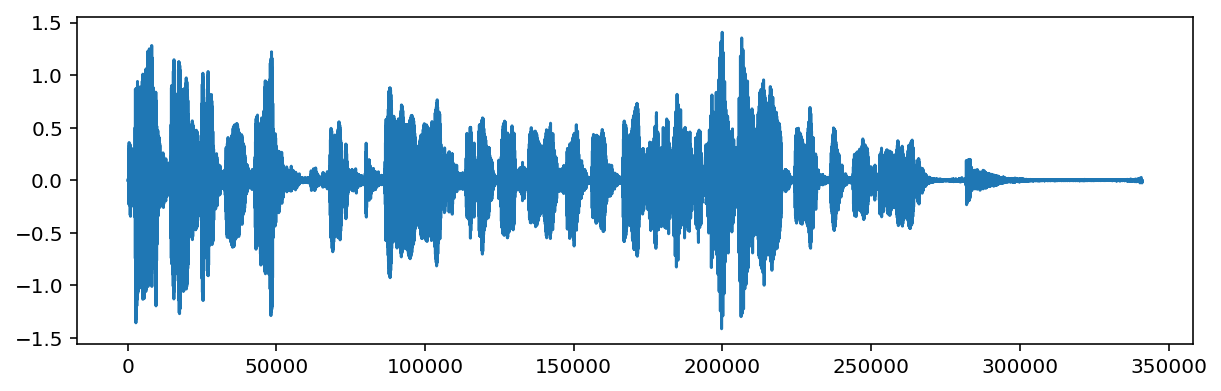

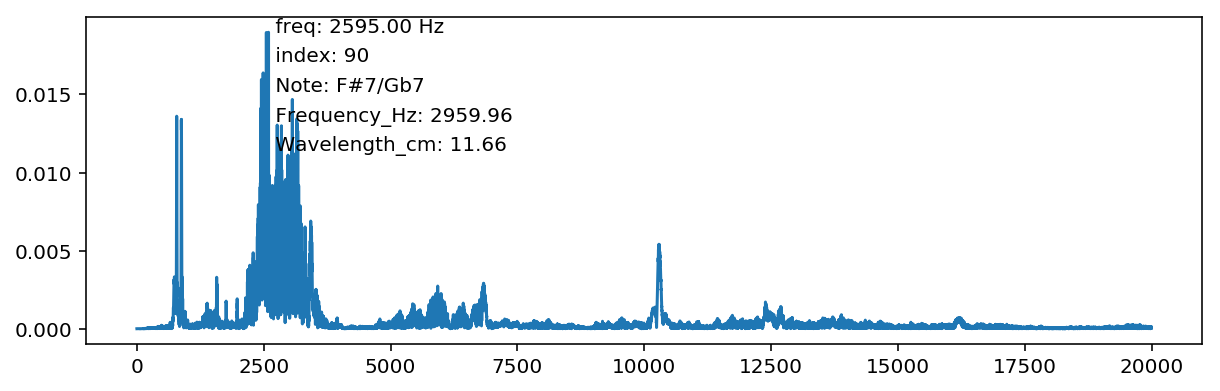

,key,90
0,index,90
1,Note,F#7/Gb7
2,Frequency_Hz,2959.96
3,Wavelength_cm,11.66


In [35]:
filename = 'E4'
y_fft = get_fft(audio.right, cut_off_freq=20000)
save_plots(audio, 
           y_fft, 
           file_name='notes/'+filename, 
           annotate=True, 
           figsize=(10, 3),
          fft=True,
          right=True)
get_note(y_fft, NOTES)

plt.figure(figsize=(15,5))

def plot_note(note):
    return(plt.plot(
        NOTES\
        [NOTES.Note.str.contains(note)]\
        [~NOTES.Note.str.contains('#')].\
        Frequency_Hz.values, 'o-', 
        label=note))

[plot_note(note) for note in ['C', 'D', 'E', 'F']]
plt.legend();


In [3]:
NOTES

,index,Note,Frequency_Hz,Wavelength_cm
0,0,C0,16.35,2109.89
1,1,C#0/Db0,17.32,1991.47
2,2,D0,18.35,1879.69
3,3,D#0/Eb0,19.45,1774.20
4,4,E0,20.60,1674.62
5,5,F0,21.83,1580.63
6,6,F#0/Gb0,23.12,1491.91
7,7,G0,24.50,1408.18
8,8,G#0/Ab0,25.96,1329.14
9,9,A0,27.50,1254.55
